# Simple RNN Scratch vs. Keras

This notebook compares the RNN Scratch implementation with Keras's RNN implementation.

## Import Library

In [49]:
import sys
import os

sys.path.append(os.path.abspath('../../../'))

In [61]:
from src.rnn.preprocessing import TextPreprocessor
from src.rnn.keras import RNNKerasModel
from src.rnn.model import RNNModel
from src.rnn.utils import load_nusax_data
import matplotlib.pyplot as plt

## Preparation

In [51]:
FOLDER_PATH = "../../../data/nusax"
OUTPUT_PATH = "../../../src/rnn/output"
WEIGHTS_FILE = "model_weights.npz"

### Load Data from CSV

In [52]:
train_texts, train_labels = load_nusax_data(FOLDER_PATH + "/train.csv")
valid_texts, valid_labels = load_nusax_data(FOLDER_PATH + "/valid.csv")
test_texts, test_labels = load_nusax_data(FOLDER_PATH + "/test.csv")

### Preprocess Data

In [53]:
preprocessor = TextPreprocessor(
        max_tokens=5000, output_sequence_length=54, embedding_dim=100
    )

preprocessor.fit(train_texts)

train_sequences = preprocessor.preprocess(train_texts)
valid_sequences = preprocessor.preprocess(valid_texts)
test_sequences = preprocessor.preprocess(test_texts)

## Keras Model Training

In [54]:
EPOCHS = 20
BATCH_SIZE = 128

In [55]:
keras_model = RNNKerasModel(
    vocab_size=preprocessor.get_vocab_size(),
    embedding_dim=100,
    rnn_units=128,
    dropout_rate=0.2,
    bidirectional=True,
)

history = keras_model.model.fit(
    train_sequences,
    train_labels,
    validation_data=(valid_sequences, valid_labels),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.3281 - loss: 1.1114 - val_accuracy: 0.4100 - val_loss: 1.0716
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6136 - loss: 0.8987 - val_accuracy: 0.5200 - val_loss: 0.9718
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7717 - loss: 0.6843 - val_accuracy: 0.4600 - val_loss: 1.0226
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8808 - loss: 0.4495 - val_accuracy: 0.4800 - val_loss: 0.9815
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9692 - loss: 0.2417 - val_accuracy: 0.4700 - val_loss: 1.0973
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9884 - loss: 0.1114 - val_accuracy: 0.5000 - val_loss: 1.1098
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0483 - val_accuracy: 0.4500 - val_loss: 1.2128
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0273 - val_accuracy: 0.5100 - val_loss: 1.1925


### Save model's weights

In [56]:
weights_path = os.path.join(OUTPUT_PATH, WEIGHTS_FILE)
keras_model.save_weights(weights_path)

## Scratch Model

In [57]:
scratch_model = RNNModel(
    vocab_size=preprocessor.get_vocab_size(),
    embedding_dim=100,
    rnn_units=128,
    dropout_rate=0.2,
    bidirectional=True,
)

scratch_model.load_weights(weights_path)

## Model Evaluation

### Training vs Validation Loss Keras Model

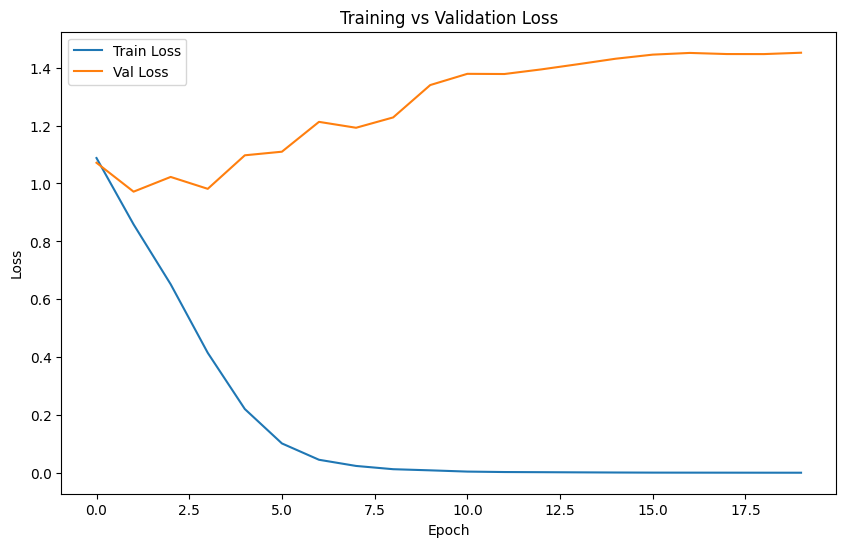

In [62]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### F1 Score Scratch vs Keras

In [58]:
keras_f1 = keras_model.evaluate(test_sequences, test_labels)
scratch_f1 = scratch_model.evaluate(test_sequences, test_labels)

print(f"Keras F1 Score: {keras_f1:.4f}")
print(f"From-scratch F1 Score: {scratch_f1:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Keras F1 Score: 0.5173
From-scratch F1 Score: 0.5165
